# SSFM TEMP FIGURE GENERATION

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import ecephys.signal.utils as kd
import hypnogram as hp 

from sklearn.decomposition import PCA
from neurodsp.plts.utils import check_ax

import sleep_score_for_me.v1.ssfm_v1 as ssfm

bp_def = dict(delta=(0.5, 4), theta=(4, 8), sigma = (11, 16), beta = (13, 30), low_gamma = (30, 55), high_gamma = (65, 90), omega=(300, 700))

hypno_colors = {
    "Wake": "forestgreen",
    "Brief-Arousal": "chartreuse",
    "Transition-to-NREM": "lightskyblue",
    "Transition-to-Wake": "palegreen",
    "NREM": "royalblue",
    "Transition-to-REM": "plum",
    "REM": "magenta",
    "Transition": "grey",
    "Art": "crimson",
    "Wake-art": "crimson",
    "Unsure": "white",
    }

# Load Test Data

In [7]:
# TEST DATA #1 ---> PAX_7, DMSO-BL
data_path = '/Volumes/paxilline/Data/PAX_7/PAX_7_TANK/PAX_7-dmso-bl'
ssfm = {}
ssfm['e'], ssfm['espg'] = kd.get_data_spg(data_path, store='EEGr', t1=0, t2=43200, channel=[1,2], window_length=10, overlap=1)
ssfm['m'], ssfm['mspg'] = kd.get_data_spg(data_path, store='EMGr', t1=0, t2=43200, channel=[1,2], window_length=10, overlap=1)

subject = "PAX_7"
exp = "exp-2"
p_2h = "/Volumes/paxilline/Data//paxilline_project_materials/PAX_7/hypnograms-PAX_7/hypno_dmso_BL1.txt"
ssfm['hyp'] = kd.load_hypnograms(subject, exp, "dmso-bl", ssfm['espg'].datetime.values.min())

read from t=0s to t=43889.95s
Using 1525.8789 Hz as SEV sampling rate for EEGr
Remember to save all data in xset-style dictionary, and to add experiment name key (key = "name") before using save_xset
read from t=0s to t=43889.95s
Remember to save all data in xset-style dictionary, and to add experiment name key (key = "name") before using save_xset


# PLOT

## Test Data-1

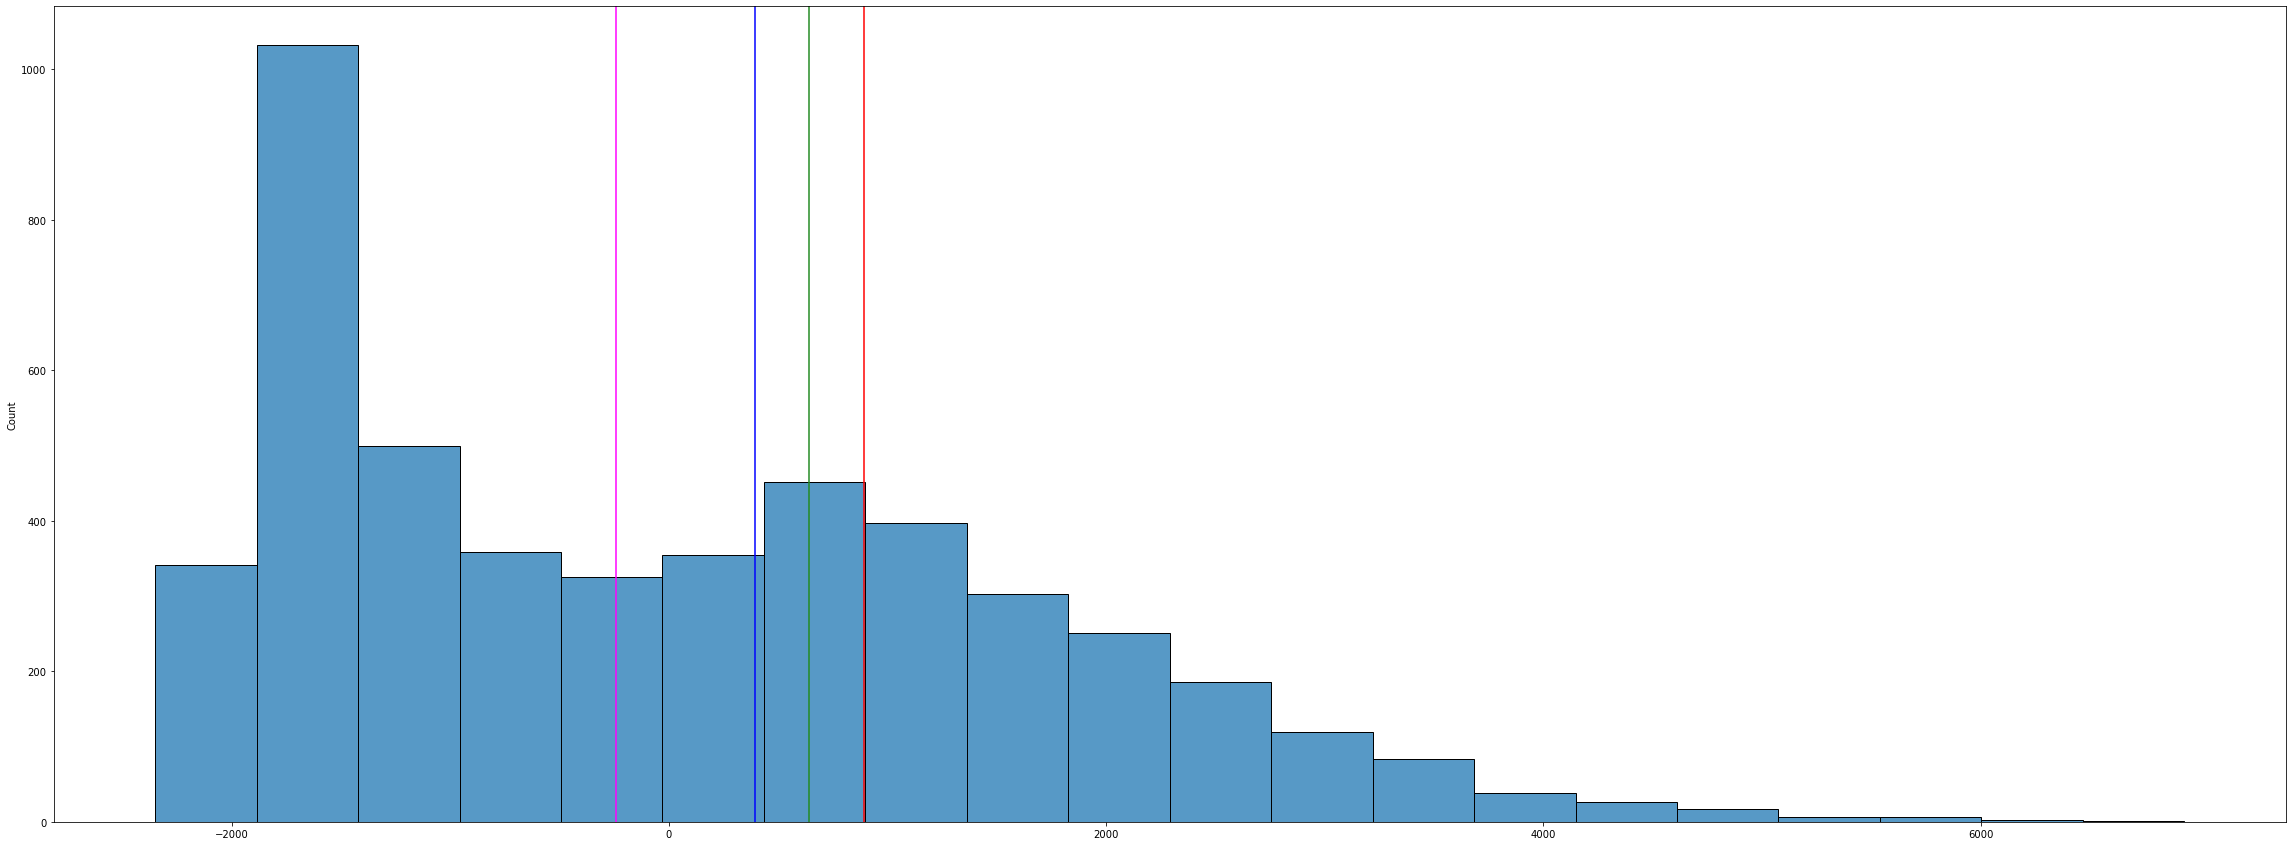

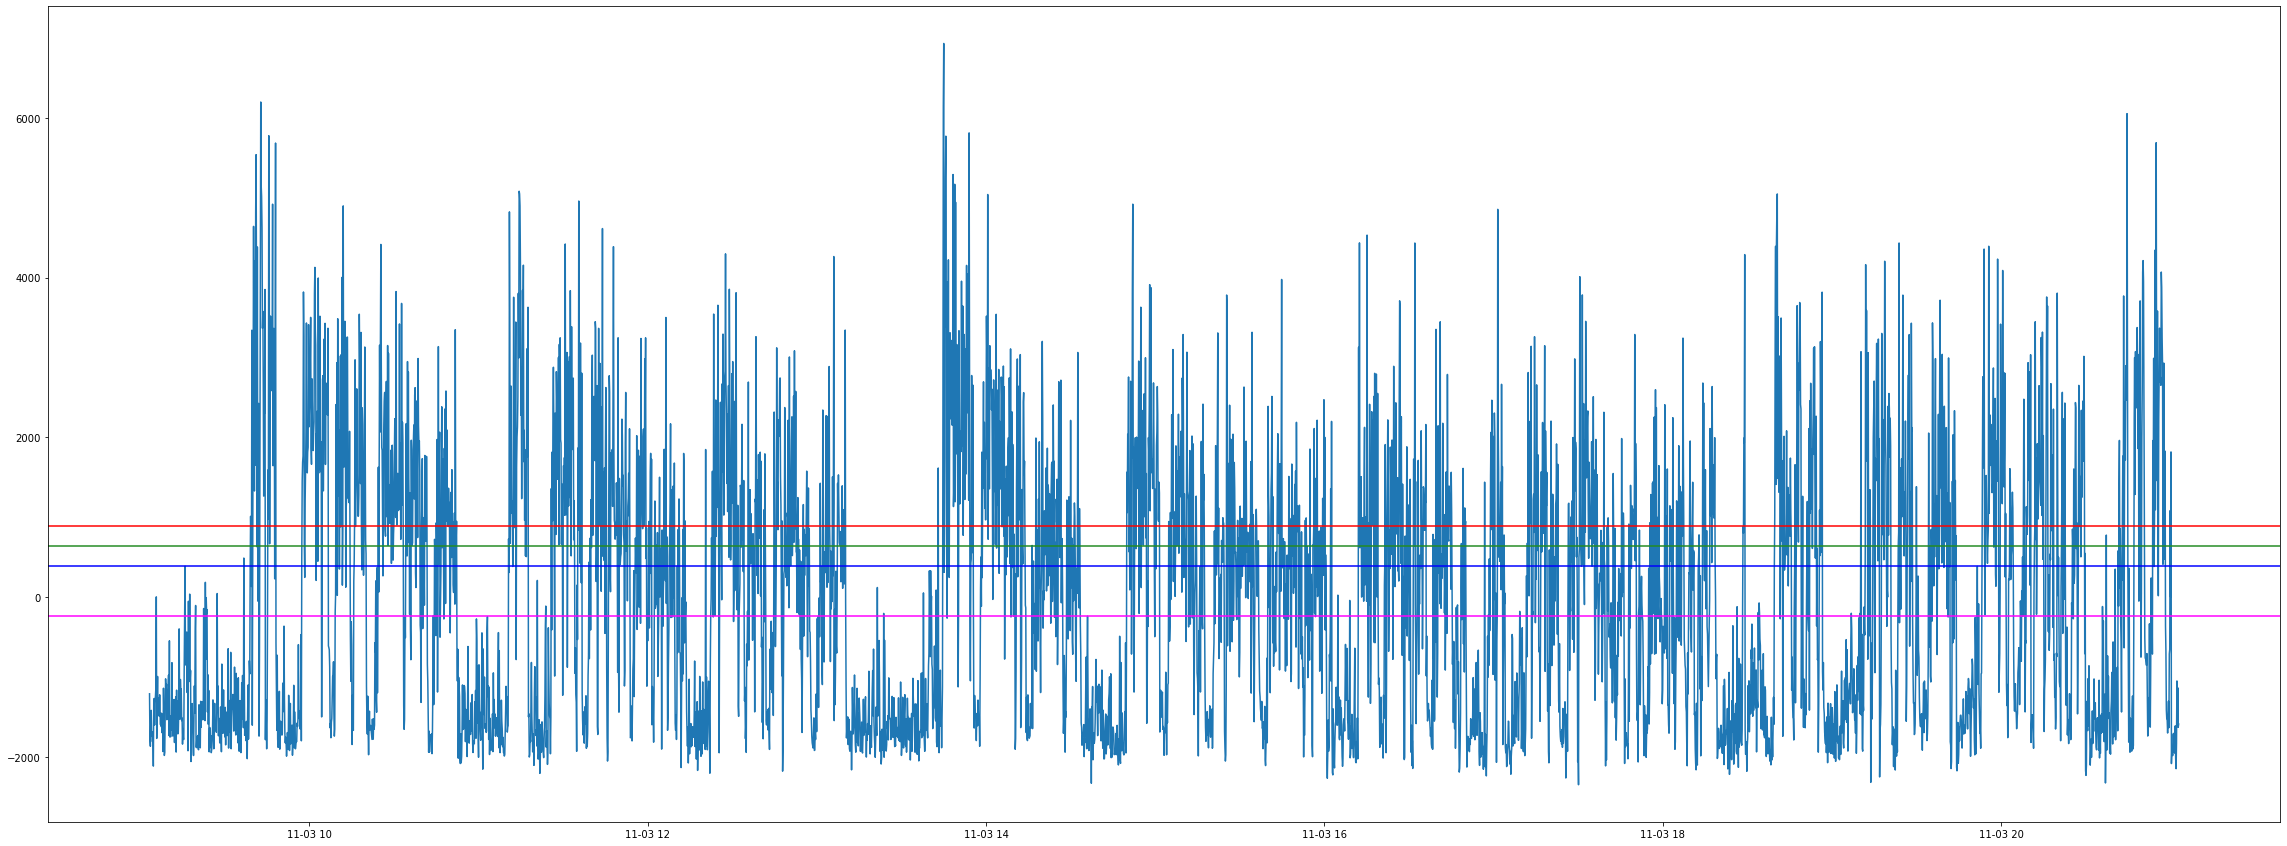

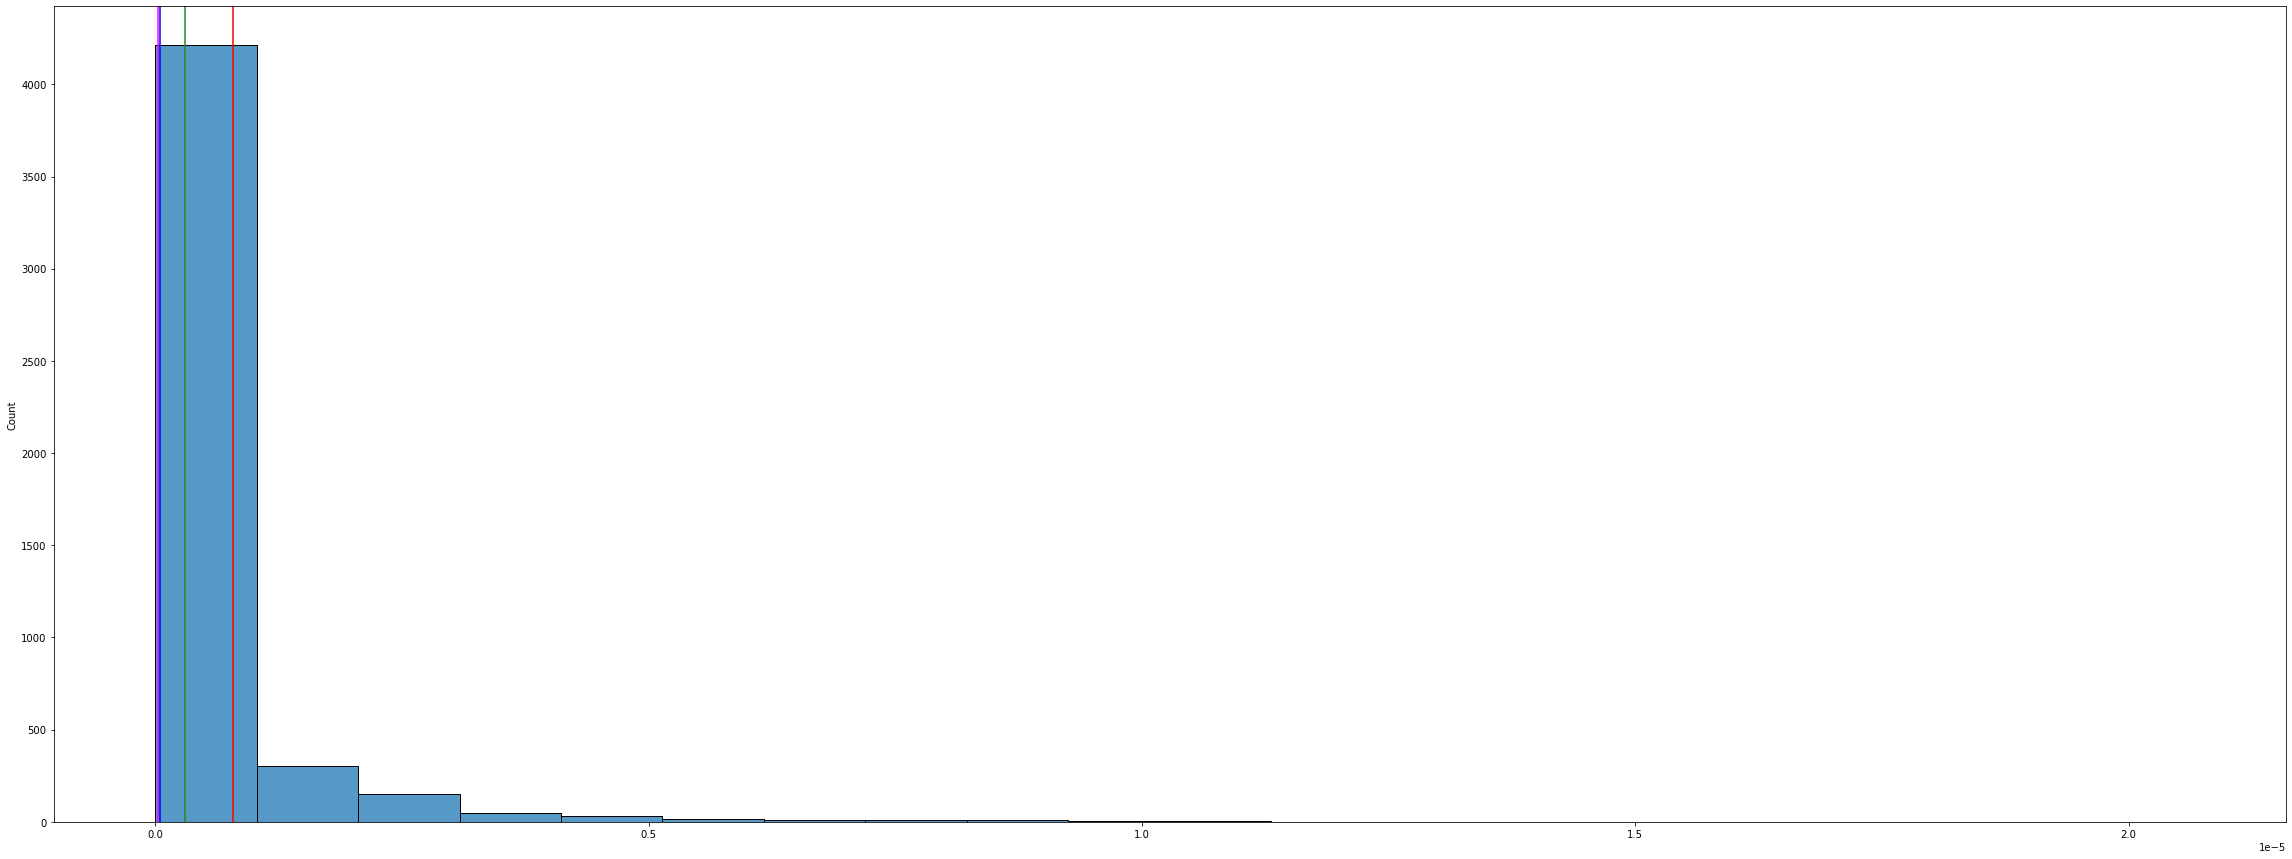

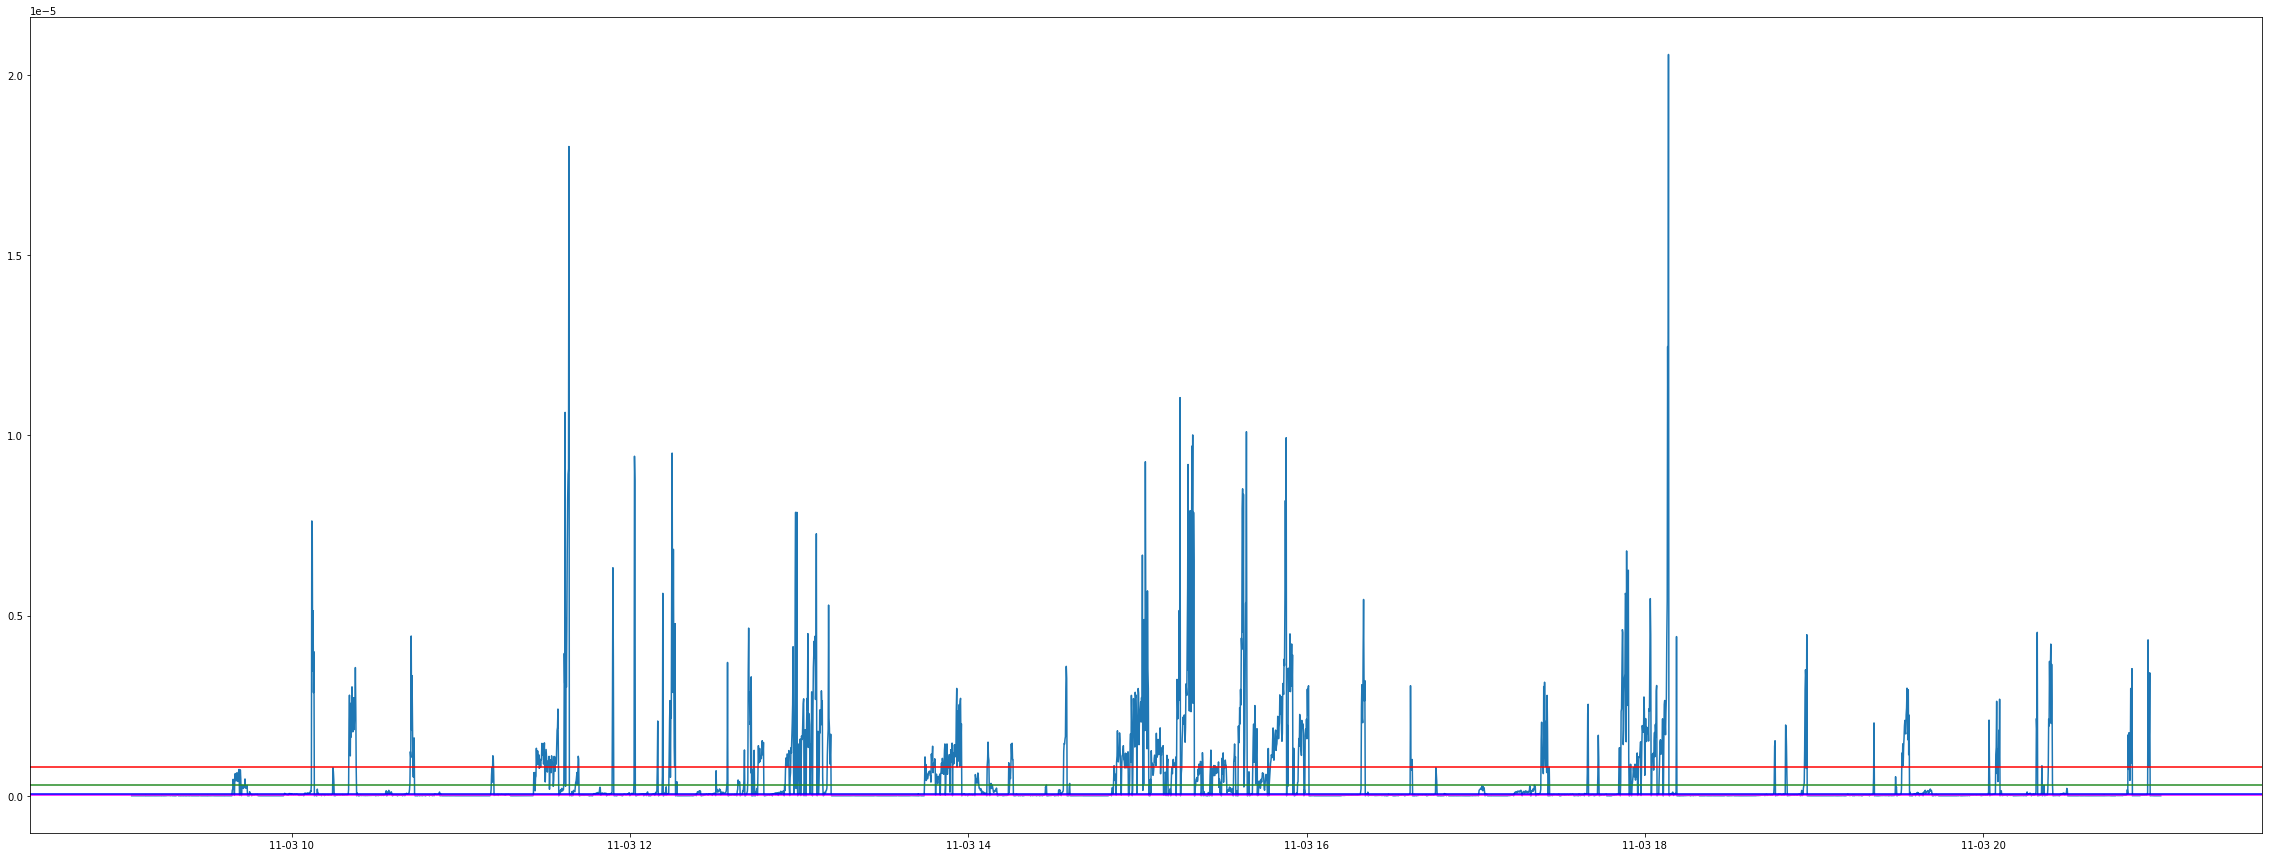

passing indexing error
passing indexing error
passing indexing error


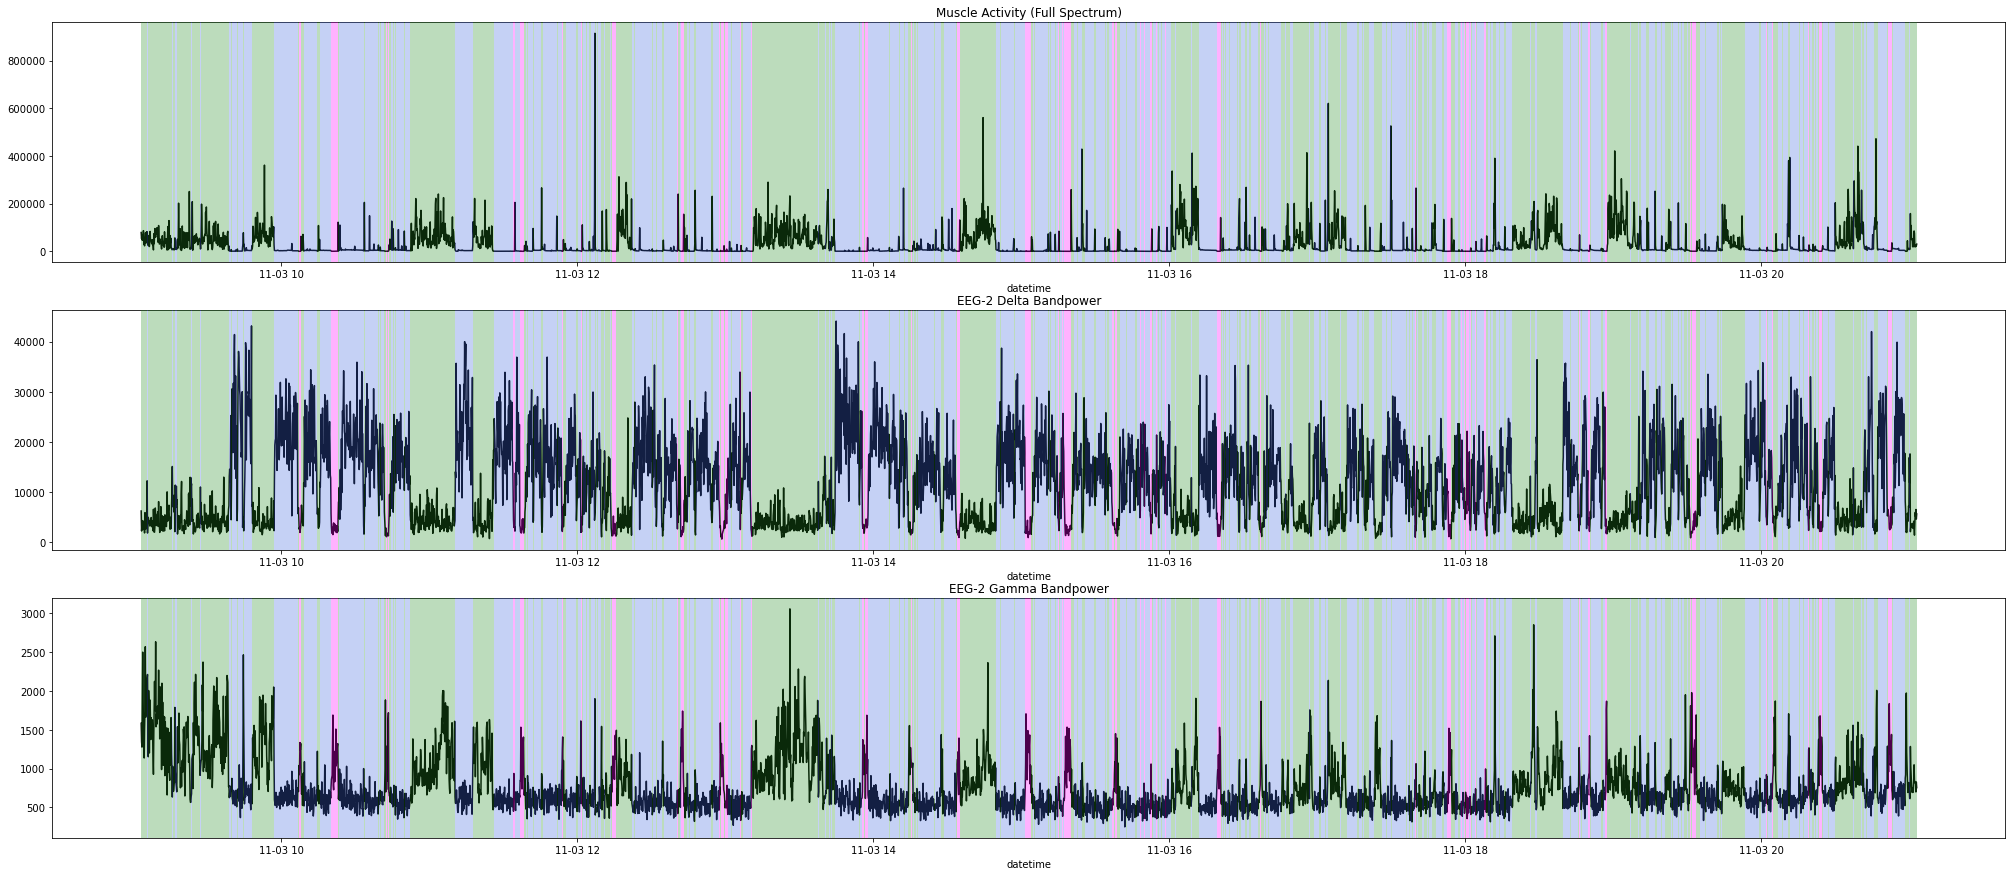

In [26]:
hyp1 = ssfm_v1(ssfm['espg'], ssfm['mspg'], chan=2)

In [10]:
ssfm['hyp'].loc[ssfm['hyp'].state=='Art', 'state'] = 'Wake'

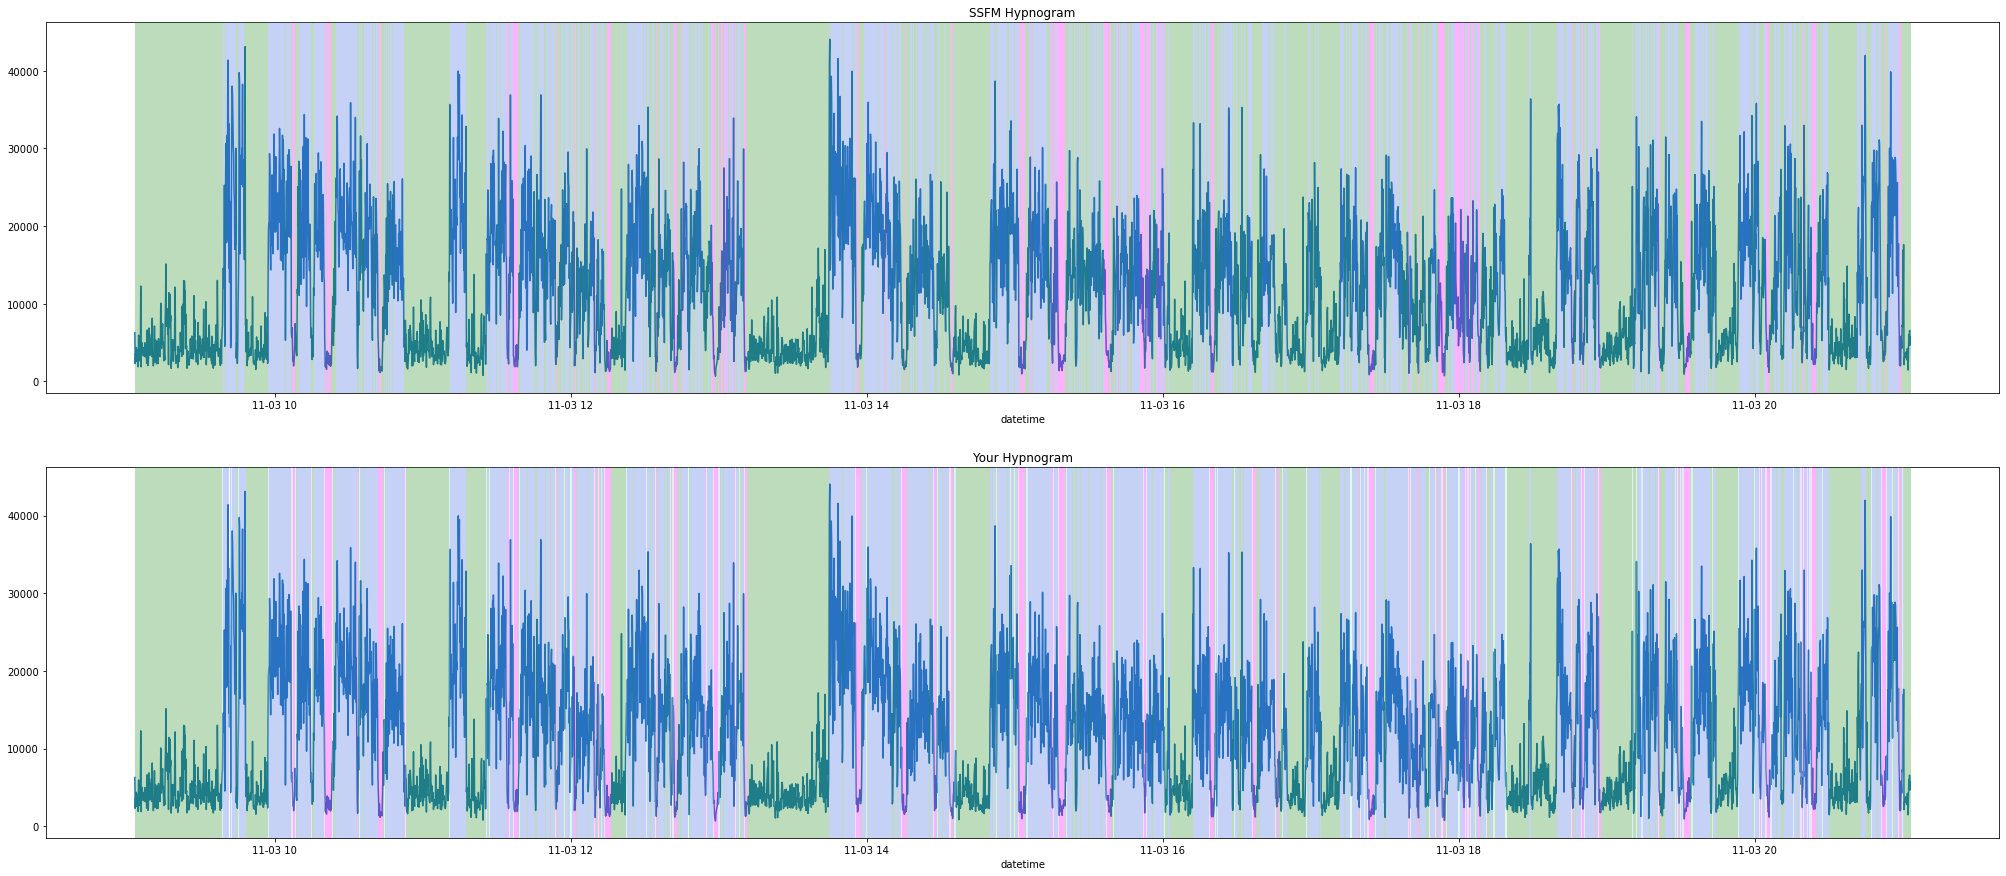

In [17]:
ss, me = compare_hypnos_for_me(ssfm['espg'], hyp1_hp, ssfm['hyp'])

In [27]:
hyp1_hp = hp.DatetimeHypnogram(hyp1)

In [28]:
hyps = [ssfm['hyp'], hyp1_hp]
hyp_keys = ['KD_hypno', 'SSFM_hypno']
frac = kd.get_frac_oc(hyps, hyp_keys)
frac

duration                                          \
state      Brief-Arousal       NREM       REM Transition-to-NREM   
KD_hypno        0.392149  49.010701  7.366095           4.116154   
SSFM_hypno           NaN  50.010419  6.522192                NaN   

                                                                     
state      Transition-to-REM Transition-to-Wake   Unsure       Wake  
KD_hypno            3.101232            0.42662  0.04574  35.541308  
SSFM_hypno               NaN                NaN      NaN  43.467389

## Test Data-2

In [30]:
# TEST DATA #1 ---> PAX_4, pax-1-BL
data_path = '/Volumes/paxilline/Data/PAX_4/PAX_4_TANK/PAX_4-pax1-bl'
ssfm2 = {}
ssfm2['e'], ssfm2['espg'] = kd.get_data_spg(data_path, store='EEGr', t1=0, t2=7200, channel=[1,2], window_length=10, overlap=1)
ssfm2['m'], ssfm2['mspg'] = kd.get_data_spg(data_path, store='EMGr', t1=0, t2=7200, channel=[1,2], window_length=10, overlap=1)


read from t=0s to t=7665.26s
Remember to save all data in xset-style dictionary, and to add experiment name key (key = "name") before using save_xset
read from t=0s to t=7665.26s
Remember to save all data in xset-style dictionary, and to add experiment name key (key = "name") before using save_xset


KeyError: 'dmso-bl'

In [38]:
subject = "PAX_4"
exp = "exp-1"
yml = "/Volumes/paxilline/Data/paxilline_project_materials/pax-hypno-paths.yaml"

ssfm2['hyp'] = kd.load_hypnograms(subject, exp, "pax1", ssfm2['espg'].datetime.values.min(), hypnograms_yaml_file=yml)


In [36]:
p_2h = "/Volumes/paxilline/Data/paxilline_project_materials/PAX_4/hypnograms-PAX_4/hypno_pax1_BL1.txt"
p_2h_je = "/Volumes/paxilline/Data/paxilline_project_materials/PAX_4/hypnograms-PAX_4/hypno_pax1_BL1_JE.txt"
ssfm2['hyp_2'] = hp.load_visbrain_hypnogram(p_2h).as_datetime(ssfm2['espg'].datetime.values.min())
ssfm2['hyp_2j'] = hp.load_visbrain_hypnogram(p_2h_je).as_datetime(ssfm2['espg'].datetime.values.min())

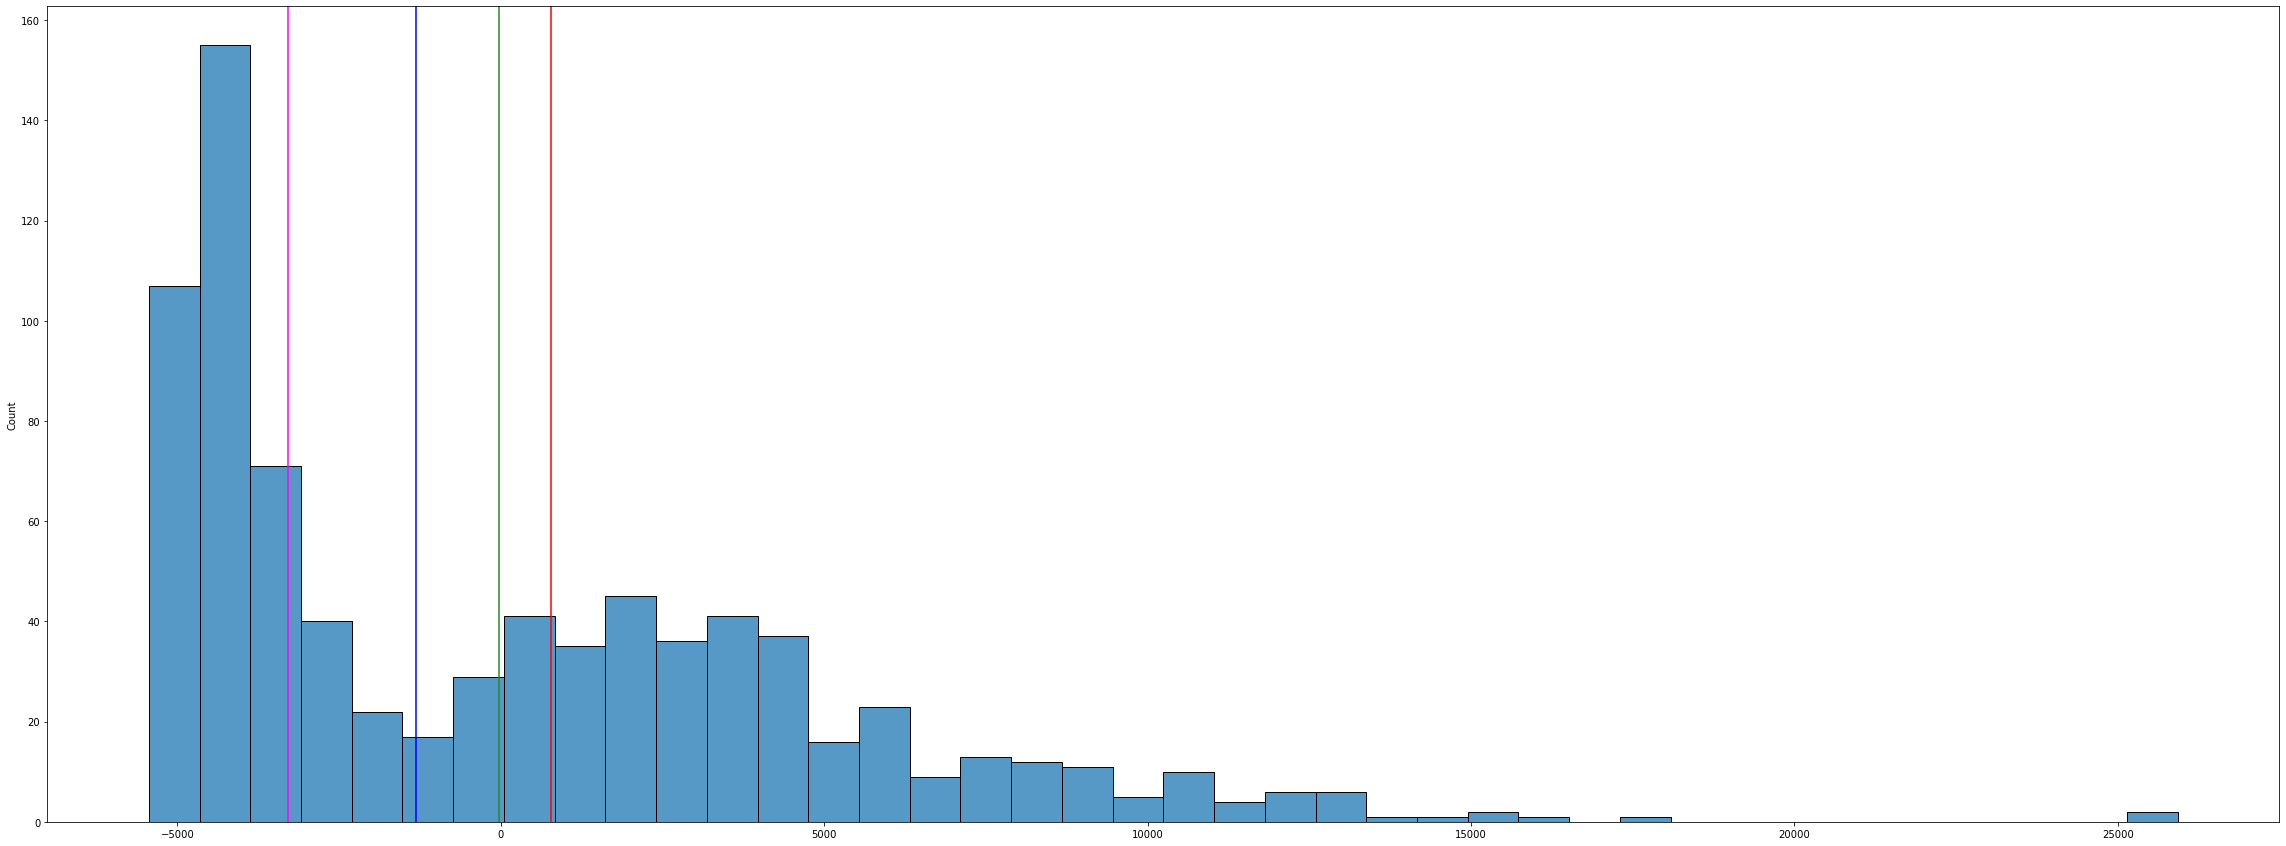

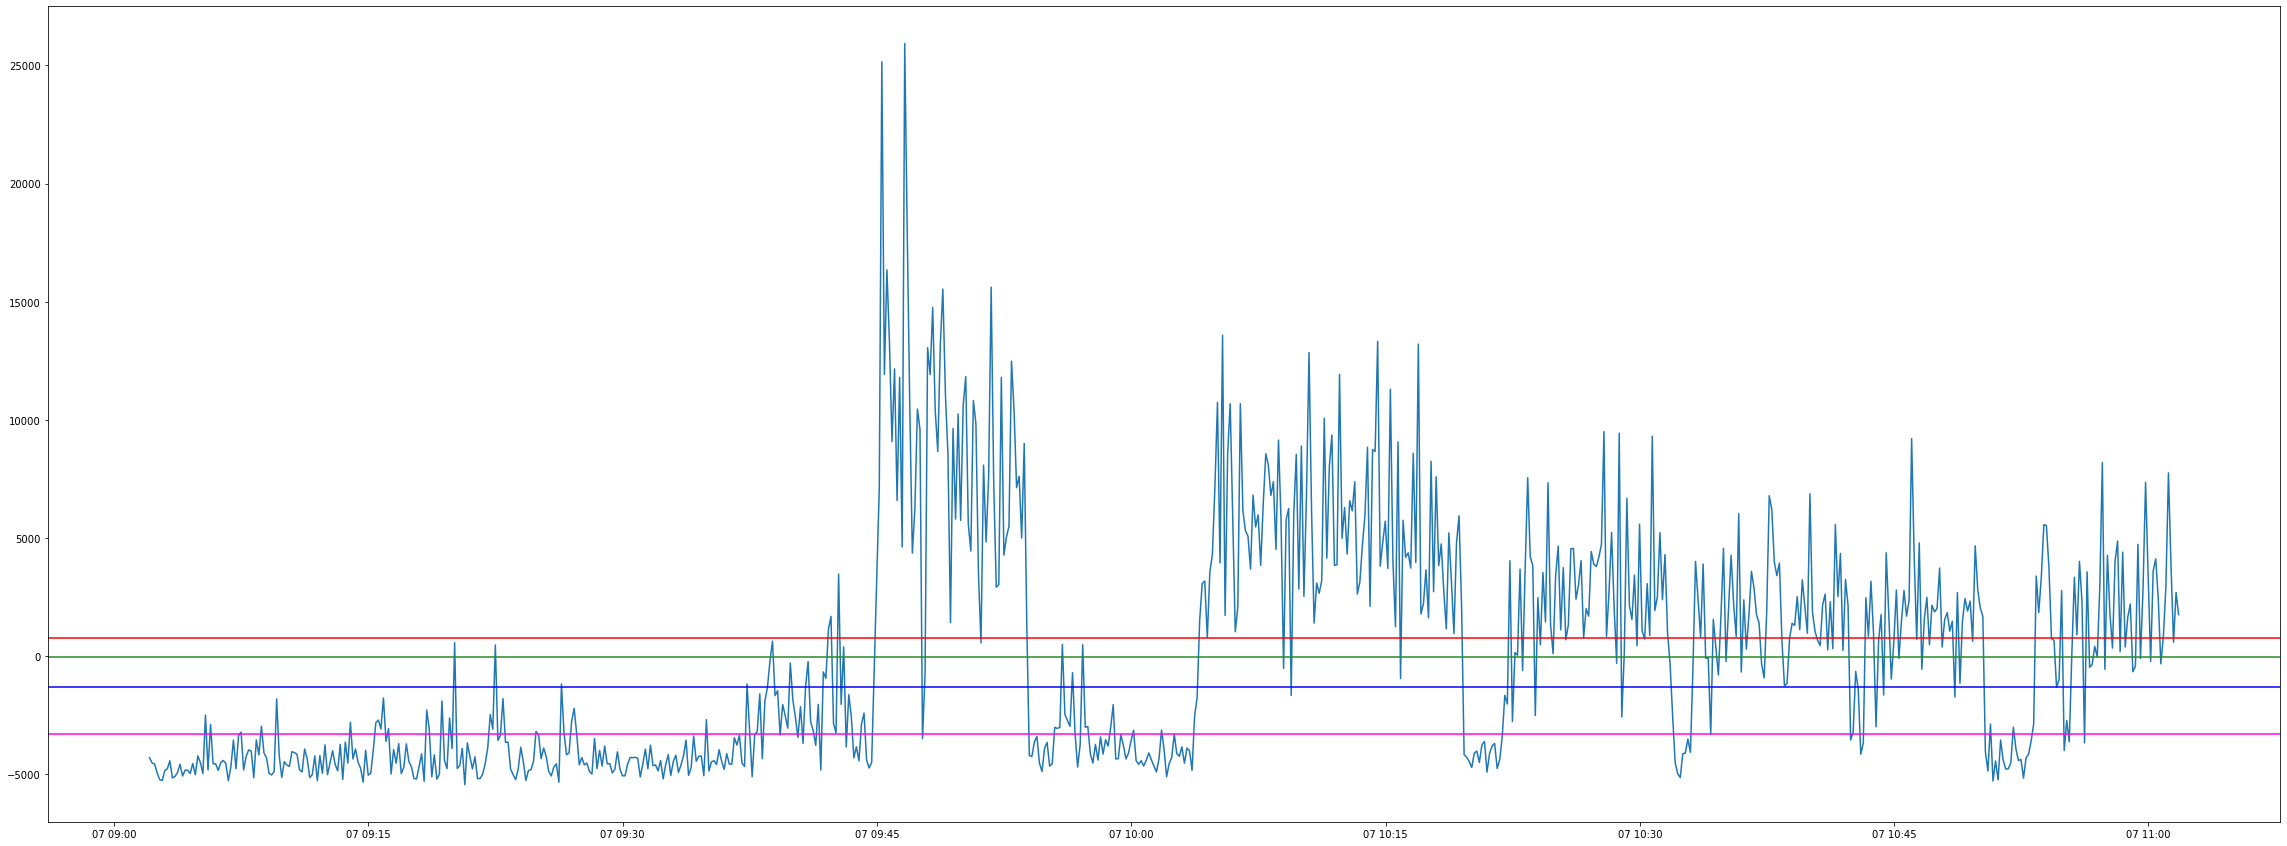

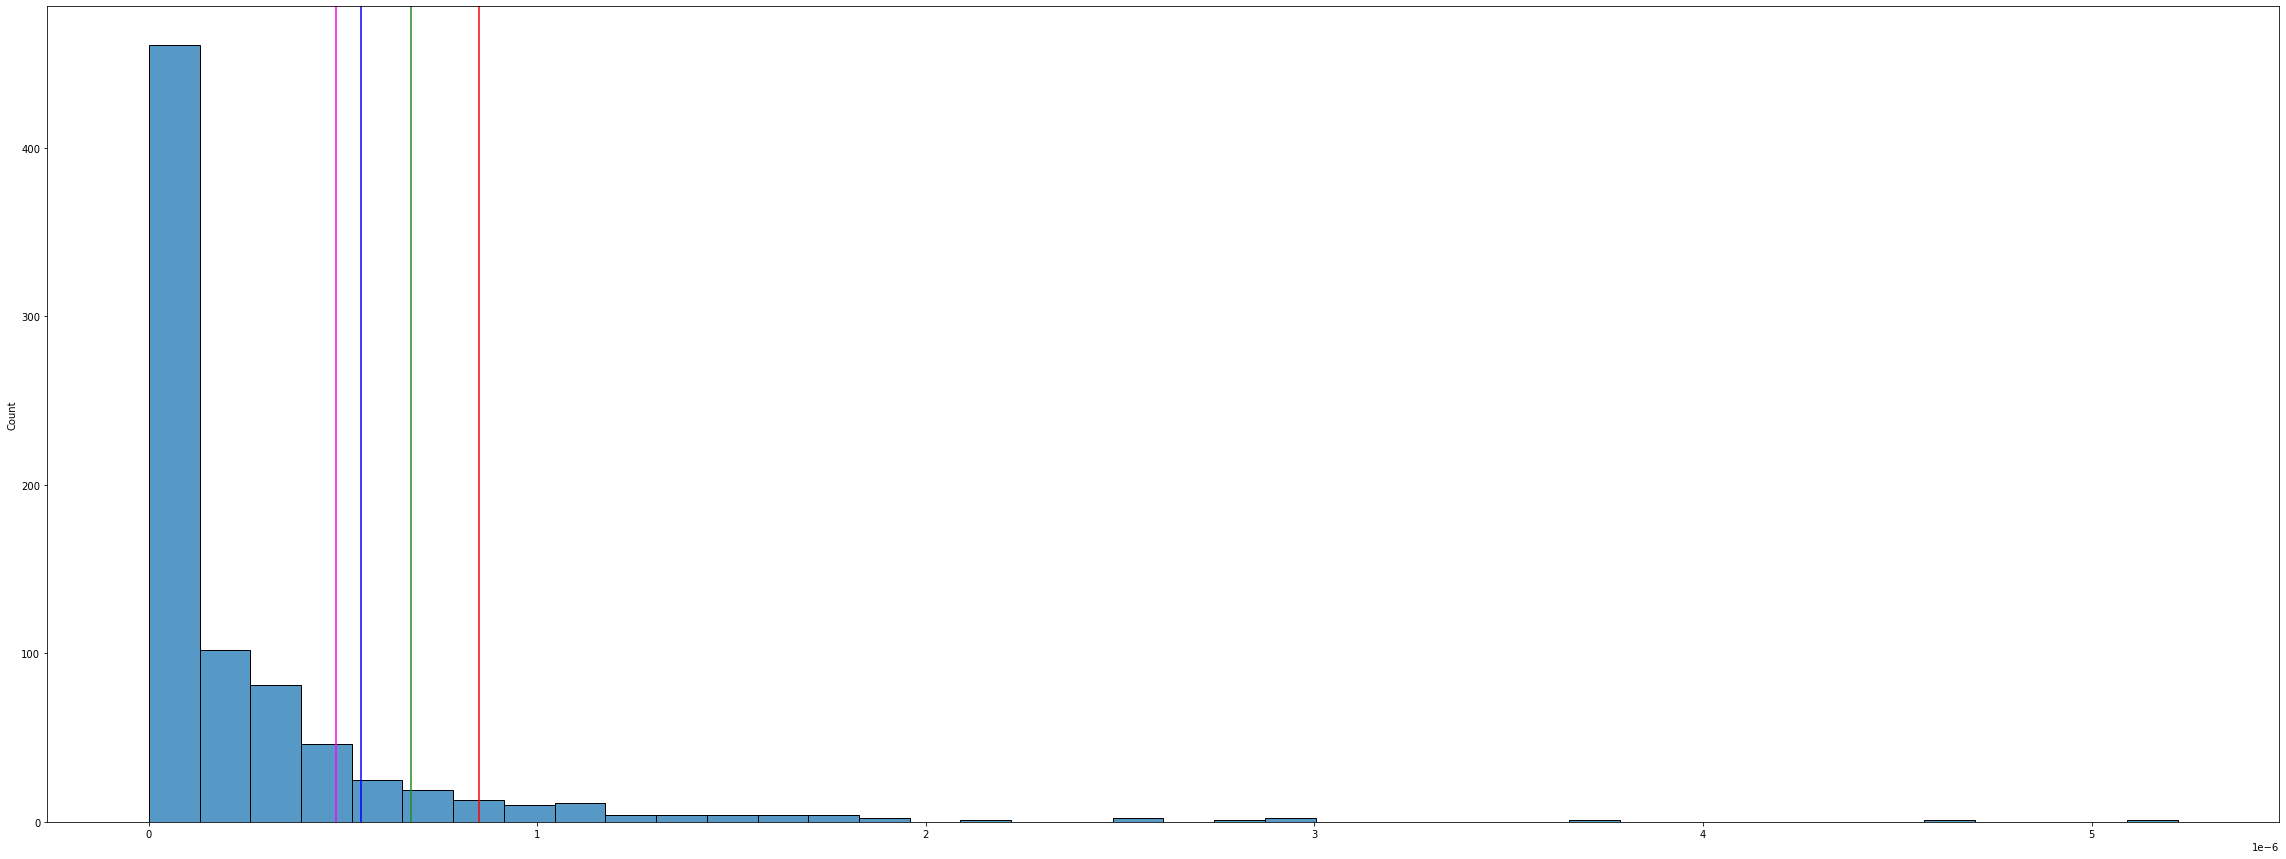

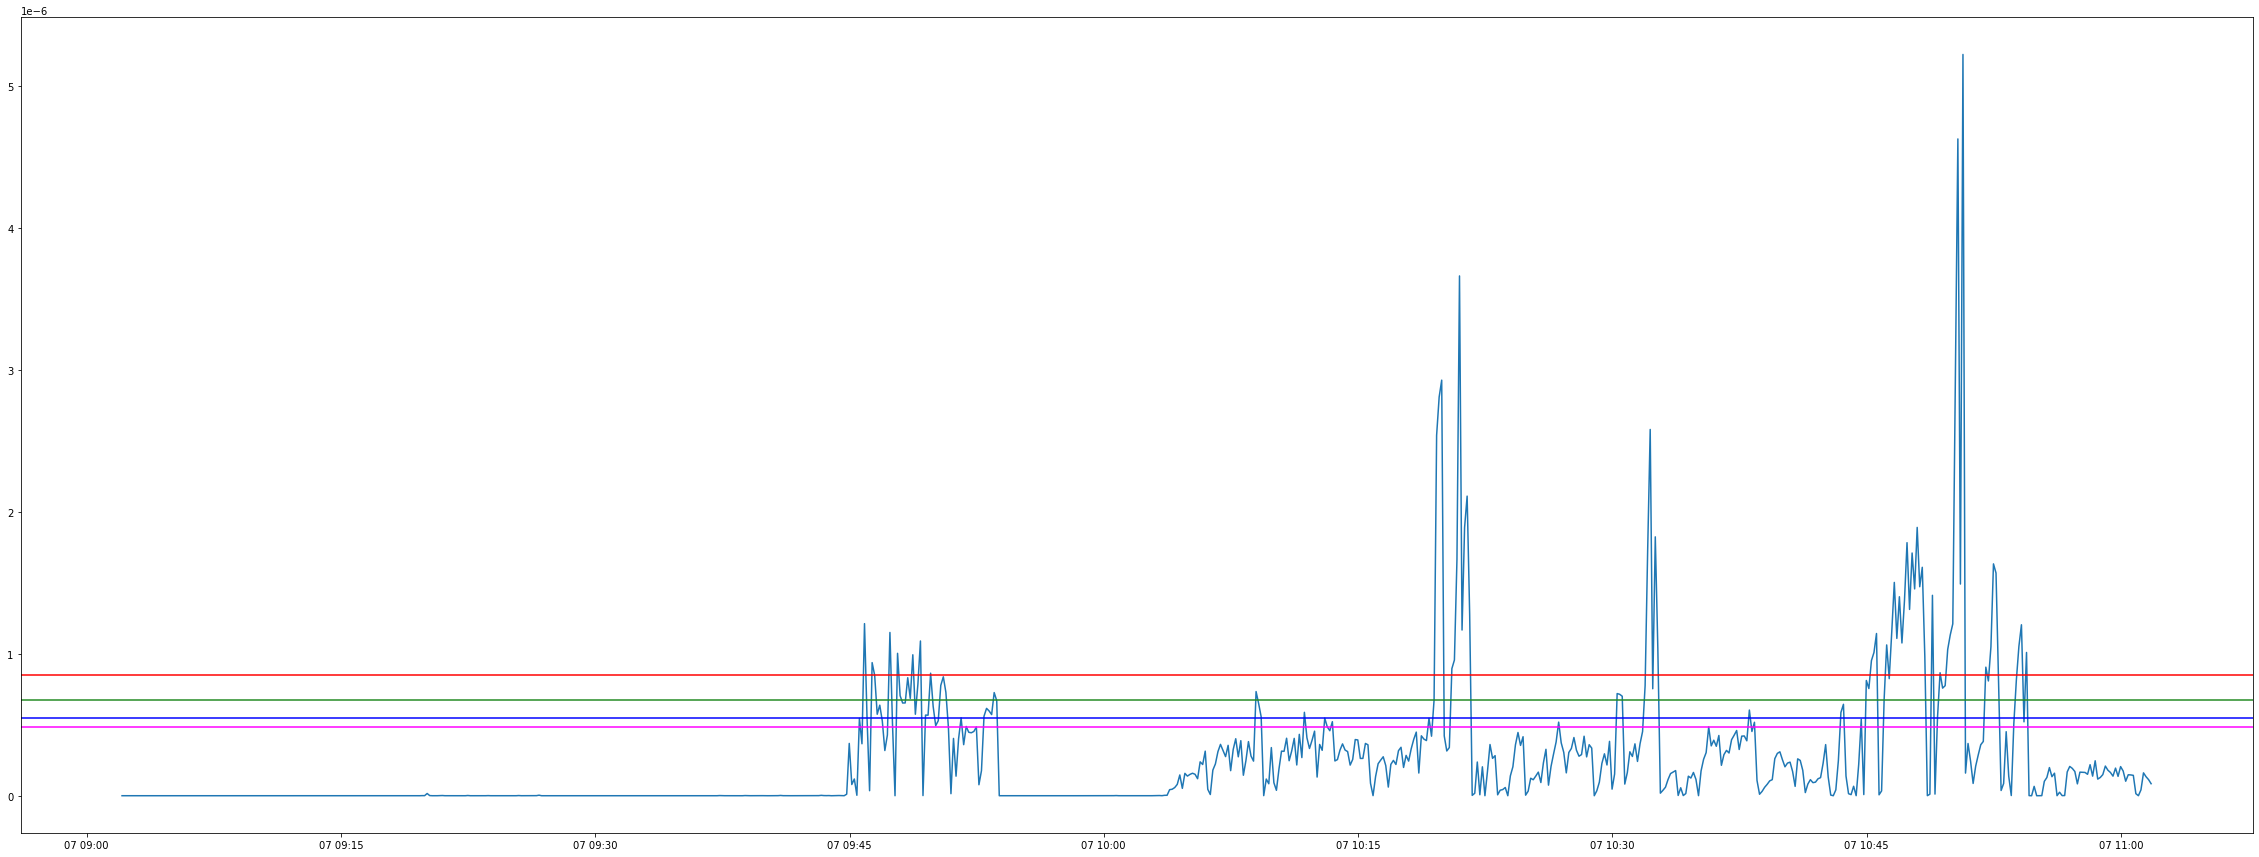

passing indexing error
passing indexing error
passing indexing error


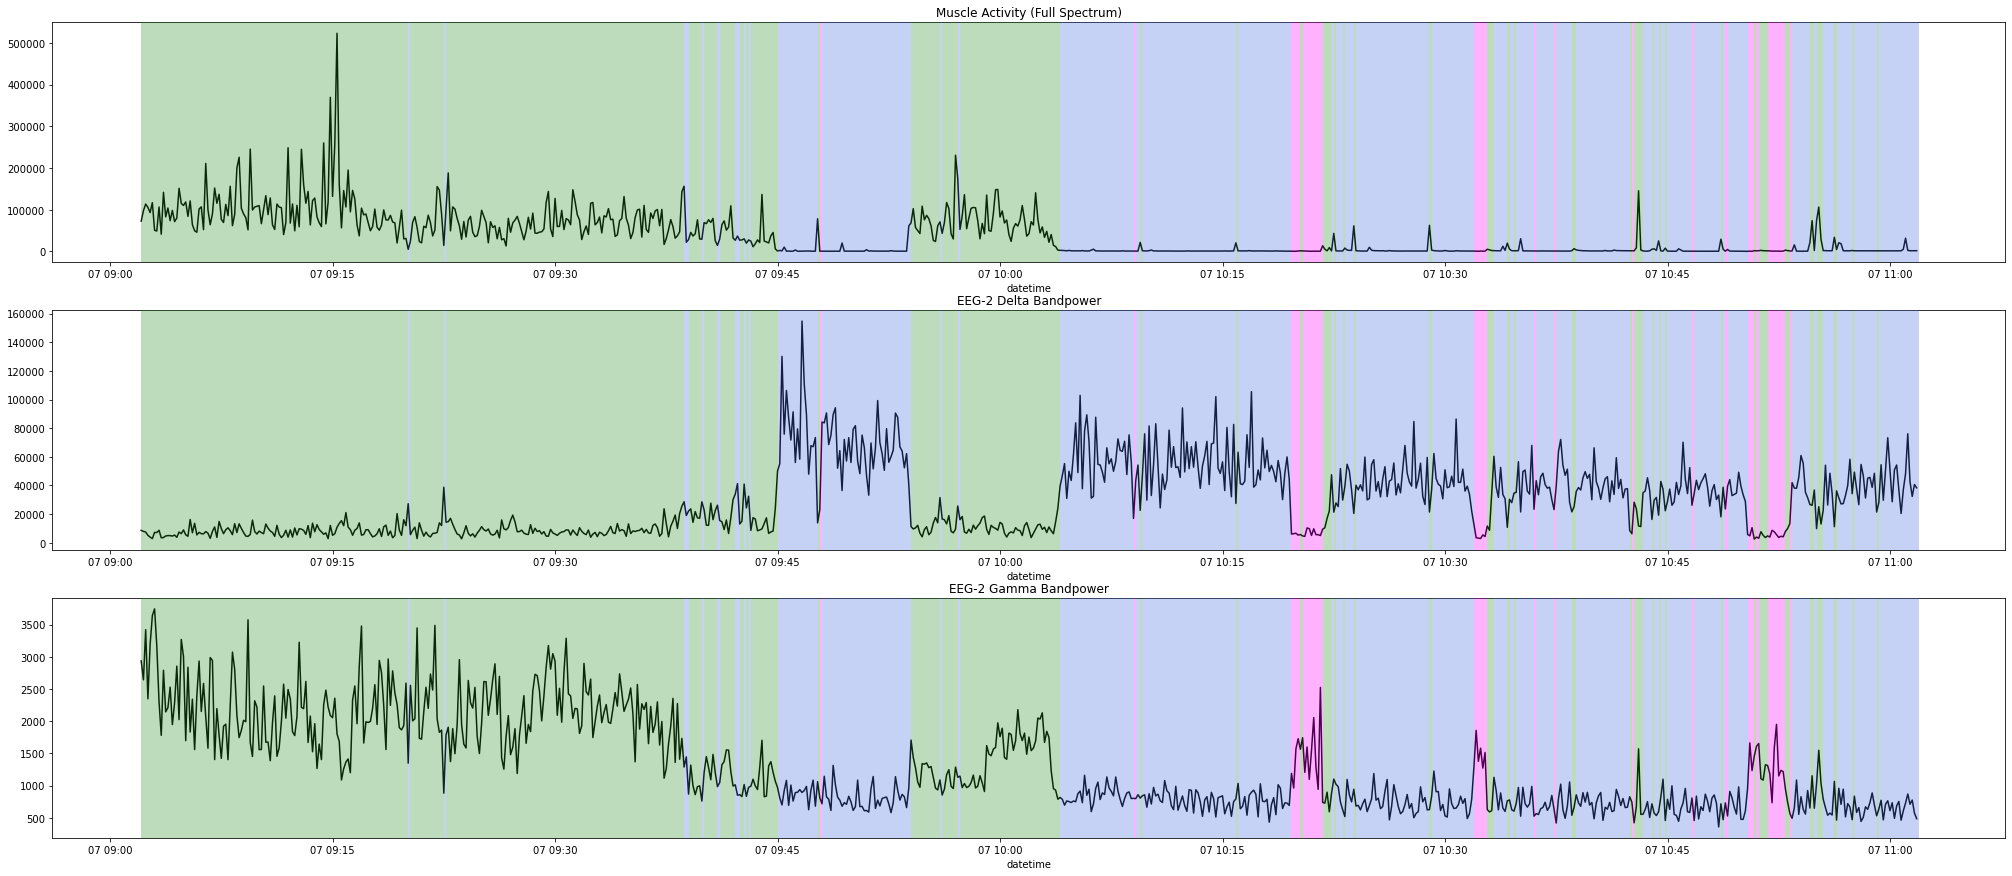

In [71]:
hyp2 = ssfm_v1(ssfm2['espg'], ssfm2['mspg'], nrem_percentiles=[40, 50, 55, 60], rem_percentiles=[85, 87, 90, 93], chan=2, f_range=slice(0, 100))

In [58]:
hyps = [ssfm2['hyp_2'], hyp2]
hyp_keys = ['KD_hypno', 'SSFM_hypno']
frac = kd.get_frac_oc(hyps, hyp_keys)
frac

duration                                          \
state      Brief-Arousal       NREM       REM Transition-to-NREM   
KD_hypno        0.535004  43.963547  4.697225           0.941665   
SSFM_hypno           NaN  45.056320  5.757196                NaN   

                                                   
state      Transition-to-REM    Unsure       Wake  
KD_hypno            0.166667  0.004164  49.691728  
SSFM_hypno               NaN       NaN  49.186483

In [45]:
hyps = [ssfm2['hyp_2'], ssfm2['hyp_2j']]
hyp_keys = ['KD_hypno', 'JE_hypno']
frac = kd.get_frac_oc(hyps, hyp_keys)
frac

duration                                          \
state    Brief-Arousal       NREM       REM Transition-to-NREM   
KD_hypno      0.535004  43.963547  4.697225           0.941665   
JE_hypno      0.522767  41.071046  4.894029           2.199444   

                                                                    
state    Transition-to-REM Transition-to-Wake    Unsure       Wake  
KD_hypno          0.166667                NaN  0.004164  49.691728  
JE_hypno          0.165419           0.146668  0.026395  50.974232

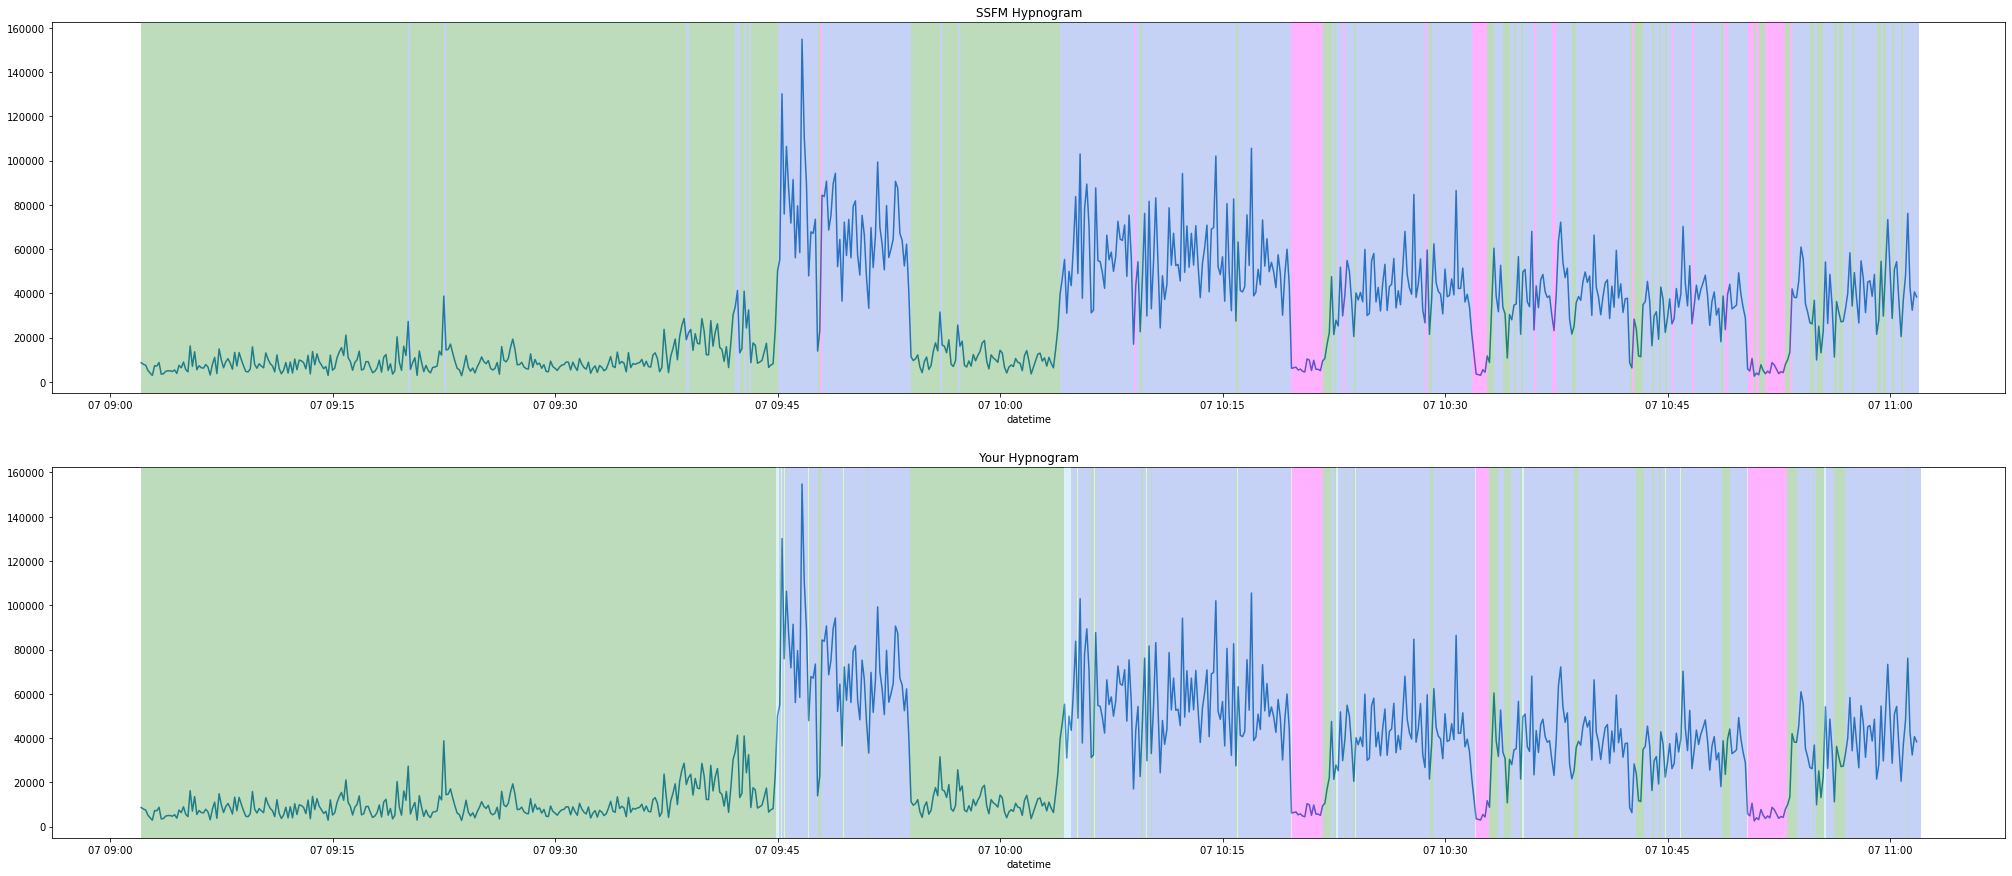

In [56]:
k, j = compare_hypnos_for_me(ssfm2['espg'], hyp2, ssfm2['hyp_2'])

In [81]:
for n in hyp2.index:
    if np.logical_and(hyp2.iloc[n]['state']=='REM', hyp2.iloc[n-1]['state']=='Wake'):
        hyp2.iloc[n]['state'] = 'Wake'
        print(n)

33
49
86
103
105
107


/home/kdriessen/miniconda3/envs/ecephys_t2/lib/python3.9/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [79]:
hyp2.iloc[2]['state'] =='Wake'

True